In [1]:
import numpy as np
from scipy import linalg
import math
import matplotlib.pyplot as plt

### Teil a

In [2]:
def vorrueck(L, R, b):
    # Initialiesierung von Werten/ Matrizen
    n = np.shape(L)
    n = int(n[0])
    # Initialisierung mit Nullmatrizen
    y = np.zeros(n, dtype=int)
    x = np.zeros(n, dtype=int)
    
    # vorwärts einsetzen
    for i in range(n): 
        y[i]= b[i]
        for j in range(i):
            y[i] = y[i] - (L[i,j] * y[j])  
    # y ist ab hier definiert    
    print("Für y gilt:",y)
    
    # rückwärts einsetzen
    for i in reversed(range(n)): 
        x[i]= y[i]
        for j in reversed(range(i,n)):
            if i != j:
                x[i] = x[i] - (R[i,j] * x[j])
        x[i] = x[i]/R[i,i]
    # x ist ab hier definiert  
    print("Für x gilt:", x)
        
    return(x)
        
# Initialiesierung der Vektoren
L = np.array([[1, 0, 0], [-2, 1, 0], [4, 5, 1]])
R = np.array([[2, -1, 6], [0, 3, 9], [0, 0, -2]])
b = np.array([18, -3, 231])

# Aufruf der Funktion
x = vorrueck(L, R, b)
print("Das Ergebnis der Rechnung ist: x= ", x)

Für y gilt: [18 33 -6]
Für x gilt: [1 2 3]
Das Ergebnis der Rechnung ist: x=  [1 2 3]


In [3]:
# Andere Testdaten

L1 = np.array([[1, 0, 0], [2, 1, 0], [4, -3, 1]])
R1 = np.array([[3, 3, 1], [0, -2, 4], [0, 0, 1]])
b1 = np.array([27, 68, 70])
x1 = vorrueck(L1, R1, b1)

print("Das Ergebnis der ersten Rechnung ist: x= ", x1)

L2 = np.array([[1, 0, 0, 0], [4, 1, 0, 0], [3, -2, 1, 0], [1, 5, -3, 1]])
R2 = np.array([[1, 2, 3, 4], [0, 5, -2, 1], [0, 0, 3, -4], [0, 0, 0, -6]])
b2 = np.array([7, 60, -56, 200])
x2 = vorrueck(L2, R2, b2)
print("Das Ergebnis der zweiten Rechnung ist: x= ", x2)

Für y gilt: [27 14  4]
Für x gilt: [6 1 4]
Das Ergebnis der ersten Rechnung ist: x=  [6 1 4]
Für y gilt: [  7  32 -13  -6]
Für x gilt: [ 2  5 -3  1]
Das Ergebnis der zweiten Rechnung ist: x=  [ 2  5 -3  1]


### Teil b

In [4]:
def lr(A):
    
    m,n=A.shape
 

    L = [[0 for x in range(n)]
             for y in range(n)]
    R = [[0 for x in range(n)]
             for y in range(n)]
    
    # lR-Zerlegung
    for i in range(n):
 
        # R(obere Dreiecksmatrix)
        for k in range(i, n):
 
            # Summe von L(i, j) * R(j, k)
            sum = 0
            for j in range(i):
                sum += (L[i][j] * R[j][k])
 
            # Algorithmus R(i, k)
            R[i][k] = A[i][k] - sum
 
        # L(untere Dreiecksmatrix)
        for k in range(i, n):
            if (i == k):
                L[i][i] = 1  # 1 in der Diagonal
            else:
                # Summe von L(k, j) * U(j, i)
                sum = 0
                for j in range(i):
                    sum += (L[k][j] * R[j][i])
                    
 
                # Algorithmus L(k, i)
                L[k][i] = int((A[k][i] - sum) / R[i][i])
 
    # Ergebnisse eingeben :
    print("Untere Dreiecksmatrix\t\tObere Dreiecksmatrix")
 
    for i in range(n):
 
        # L-Matrix
        for j in range(n):
            print(L[i][j], end="\t")
        print("", end="\t")
 
        # R-Matrix
        for j in range(n):
            print(R[i][j], end="\t")
        print("")

In [5]:
L = np.array([[1, 0, 0], [-2, 1, 0], [4, 5, 1]])
R = np.array([[2, -1, 6], [0, 3, 9], [0, 0, -2]])
X=np.matmul(L,R)
lr(X)

Untere Dreiecksmatrix		Obere Dreiecksmatrix
1	0	0		2	-1	6	
-2	1	0		0	3	9	
4	5	1		0	0	-2	


### Teil C

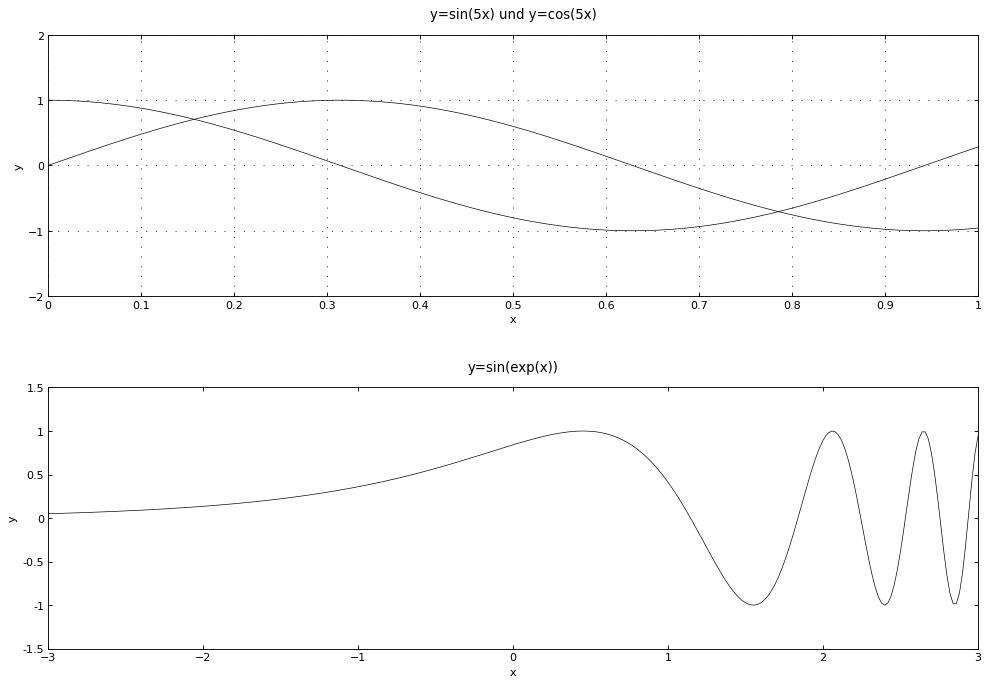

In [6]:
f1=plt.figure(figsize=(15, 16), dpi=80)

# 1. Subplot: sin(5x)/cos(5x)
ax1 = plt.subplot(311)

x_werte=np.linspace(0,1,300)
y_werte_sinus=[]
y_werte_cosinus=[]
for i in range(len(x_werte)):
    y_werte_sinus.append(math.sin(5*x_werte[i]))
    y_werte_cosinus.append(math.cos(5*x_werte[i]))
    
plt.plot(x_werte, y_werte_sinus, color = 'black', linewidth=0.6) 
plt.plot(x_werte, y_werte_cosinus, color = 'black', linewidth=0.6) 

#Eingabe der Skala
x_ticks1=np.linspace(0,1,11)
y_ticks1=np.linspace(-2,2,5)


plt.title("y=sin(5x) und y=cos(5x)", pad ='15')
plt.xticks(ticks=x_ticks1)
plt.yticks(ticks=y_ticks1)
plt.xticks([0, 0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], ['0', '0.1', '0.2', '0.3','0.4', '0.5', '0.6','0.7', '0.8', '0.9', '1']) 
plt.tick_params(axis="both", right=True, top=True, direction="in")
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.grid(color='k', linestyle=(0, (1, 10))) #Loosely dotted
plt.xlabel("x") 
plt.ylabel("y") 

# 2. Subplot: sin(exp(x))

ax2 = plt.subplot(312)
y_werte_exponential=[]
x_werte_exponential=np.linspace(-3,3,300)
y_werte_exponential=np.sin(np.exp(x_werte_exponential))
plt.plot(x_werte_exponential, y_werte_exponential, color = 'black', linewidth=0.6) 


#Eingabe der Skala
x_ticks2=np.linspace(-3,3,7)
y_ticks2=np.linspace(-1.5,1.5,7)
plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['-1.5', '-1', '-0.5', '0', '0.5', '1', '1.5'])

plt.title("y=sin(exp(x))", pad='15')
plt.xticks(ticks=x_ticks2)
plt.yticks(ticks=y_ticks2)
plt.tick_params(axis="both", right=True, top=True, direction="in")
plt.xlim(-3, 3)
plt.ylim(-1.5, 1.5)
# plt.grid(color='k', linestyle=(0, (1, 10))) #Loosely dotted
plt.xlabel("x") 
plt.ylabel("y") 

#Plots Einstellungen
plt.subplots_adjust(hspace=0.35)
plt.show() 